[-83.65] [25.7]
[-84.275] [27.345]
[-82.931] [27.589]


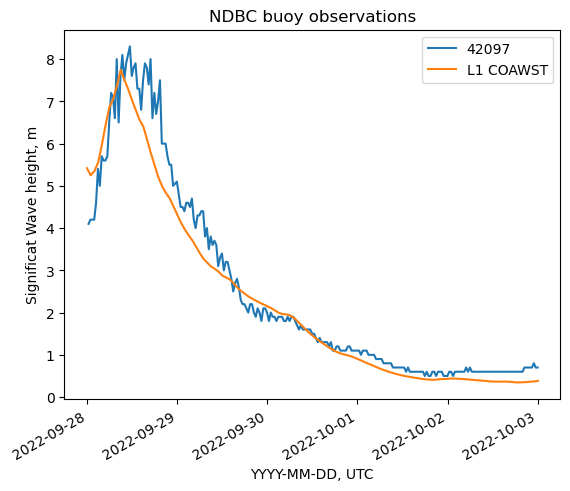

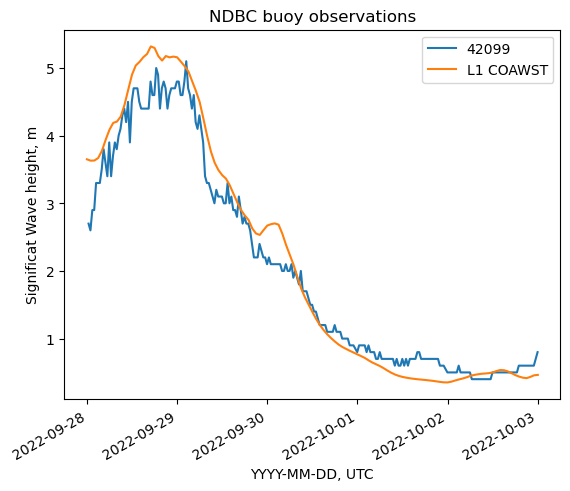

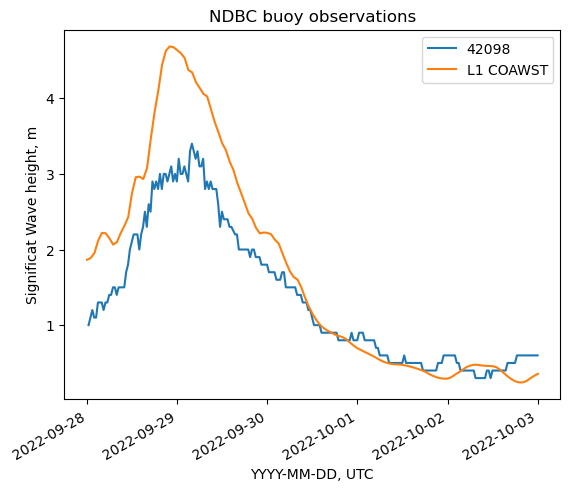

In [1]:
# Notebook setup
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime
import xroms
roms_file = 'http://icoast.rc.ufl.edu/thredds/dodsC/coawst/L1/GOMSAB_2km/qck/files/L1_qck_20220928.nc'
run_name = 'L1_20220928_00'
chunks={'ocean_time':121,'xi_rho':690,'eta_rho':545}
ds_mod = xroms.open_netcdf(roms_file,chunks=chunks) ####<<<<<SWICTHED TO XROMS FROM XARRA
#ds_mod = xr.open_dataset(roms_file)
time_ini_model = ds_mod.ocean_time.values[0]
time_end_model = ds_mod.ocean_time.values[-1]
#t_ini = str(np.datetime_as_string(time_ini_model))
#t_end = str(np.datetime_as_string(time_end_model))<<<<<<<<COMMENTED OUT AS IS UNCESSARY
#print(t_ini[0:10],t_end[0:10]) 


buoys = "42097","42099","42098"

for buoy in buoys:
     # Open dataset
     url ='https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/' + str(buoy) + '/' + str(buoy) + 'h9999.nc'
     ds = xr.open_dataset(url)
     lat1 = ds.latitude.values
     lon1 = ds.longitude.values
     print(lon1,lat1)
     #ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/42098/42098h9999.nc')
     # Subset the dataset to 1 year
     #ds = ds.sel(time=slice(t_ini[0:10],t_end[0:10]))
     ds = ds.sel(time=slice(time_ini_model,time_end_model)) ####<<<<<We can us the datetime object to subset. no need to convert to strings. 

     #### REMOVED and replaced with the line below.    
     #lon_rho = ds_mod.lon_rho.values
     #lat_rho = ds_mod.lat_rho.values
     #mask_rho = ds_mod.mask_rho.values    
     #lon_rho[np.where(mask_rho==0)] = 0
     #lat_rho[np.where(mask_rho==0)] = 0    
     # Find closest ROMS nodes to station locations
     #dist = np.sqrt((lon_rho-lon1)**2+(lat_rho-lat1)**2)
     #indy, indx = np.where(dist == np.amin(dist))

     HWavel = ds_mod.Hwave.xroms.sel2d(lon1, lat1)

     plt.figure()
     ds.wave_height.plot()
    # ds_mod.Hwave.isel(xi_rho = indx, eta_rho = indy).plot() 
     HWavel.plot() ##<<<<Chnaged the L1 plot command. 
     plt.title('NDBC buoy observations')
     plt.ylabel('Significat Wave height, m')
     plt.xlabel('YYYY-MM-DD, UTC')
     plt.gca().legend([buoy, "L1 COAWST"])
     fig_name = buoy + '_v2_' + run_name + '.png'
     plt.savefig(fig_name)